## Data Features Description:

    **Person_Age - The age of the person - Float
    **person_gender - Gender of the person - Categorical
    **person_education - Highest education level - Categorical
    **person_income - Annual income - Float
    **person_emp_exp - Years of employment experience - Integer
    **person_home_ownership - Home ownership status (e.g., rent, own, mortgage) - Categorical
    **loan_amnt - Loan amount requested - Float
    **loan_intent - Purpose of the loan - Categorical
    **loan_int_rate - Loan interest rate - Float
    **loan_percent_income - Loan amount as a percentage of annual income - Float
    **cb_person_cred_hist_length - Length of credit history in years - Float
    *credit_score - Credit score of the person - Integer
    **previous_loan_defaults_on_file - Indicator of previous loan defaults - Categorical
    **loan_status (target variable) - Loan approval status: 1 = approved; 0 = rejected - Integer

In [1]:
#base
import pandas as pd
import numpy as np
#plots
import seaborn as sns
import matplotlib.pyplot as plt
#preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("loan_data.csv")

In [3]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [6]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [7]:
#extract categorical columns
cat_columns = ['person_gender', 'person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [8]:
#numerical_columns
num_columns = ['person_age', 'person_income','person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','credit_score']

In [9]:
#convert categorical columns
for col in cat_columns:
    data[col] = data[col].astype('category')

# EXPLORATORY DATA ANALYSIS

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   person_age                      45000 non-null  float64 
 1   person_gender                   45000 non-null  category
 2   person_education                45000 non-null  category
 3   person_income                   45000 non-null  float64 
 4   person_emp_exp                  45000 non-null  int64   
 5   person_home_ownership           45000 non-null  category
 6   loan_amnt                       45000 non-null  float64 
 7   loan_intent                     45000 non-null  category
 8   loan_int_rate                   45000 non-null  float64 
 9   loan_percent_income             45000 non-null  float64 
 10  cb_person_cred_hist_length      45000 non-null  float64 
 11  credit_score                    45000 non-null  int64   
 12  previous_loan_defa

In [11]:
#check for missing values
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
#data description
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [13]:
#check for high cardinality
data[cat_columns].nunique()

person_gender                     2
person_education                  5
person_home_ownership             4
loan_intent                       6
previous_loan_defaults_on_file    2
dtype: int64

In [14]:
#create data copy for visualization

In [15]:
data1 = data.copy()

## CATEGORICAL DATA EDA

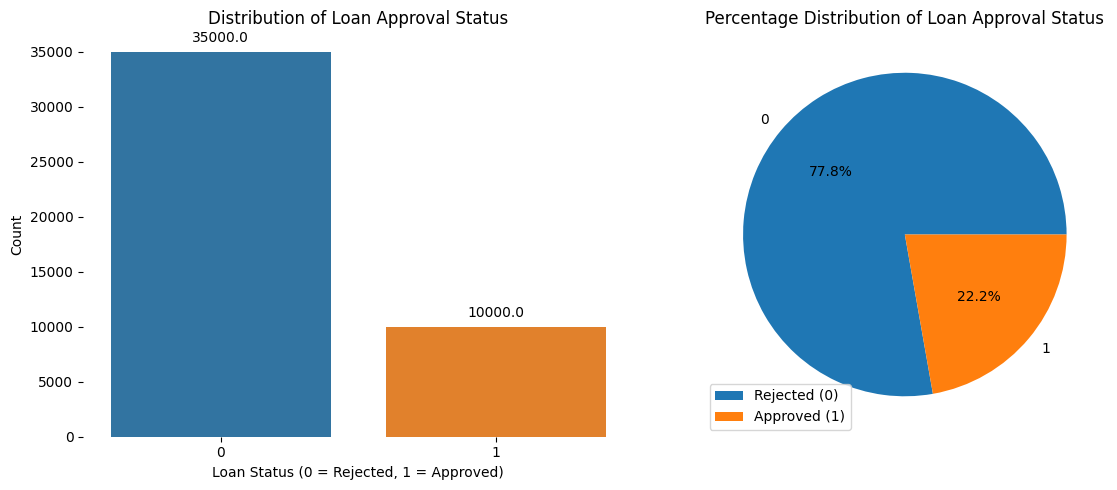

In [16]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = data['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

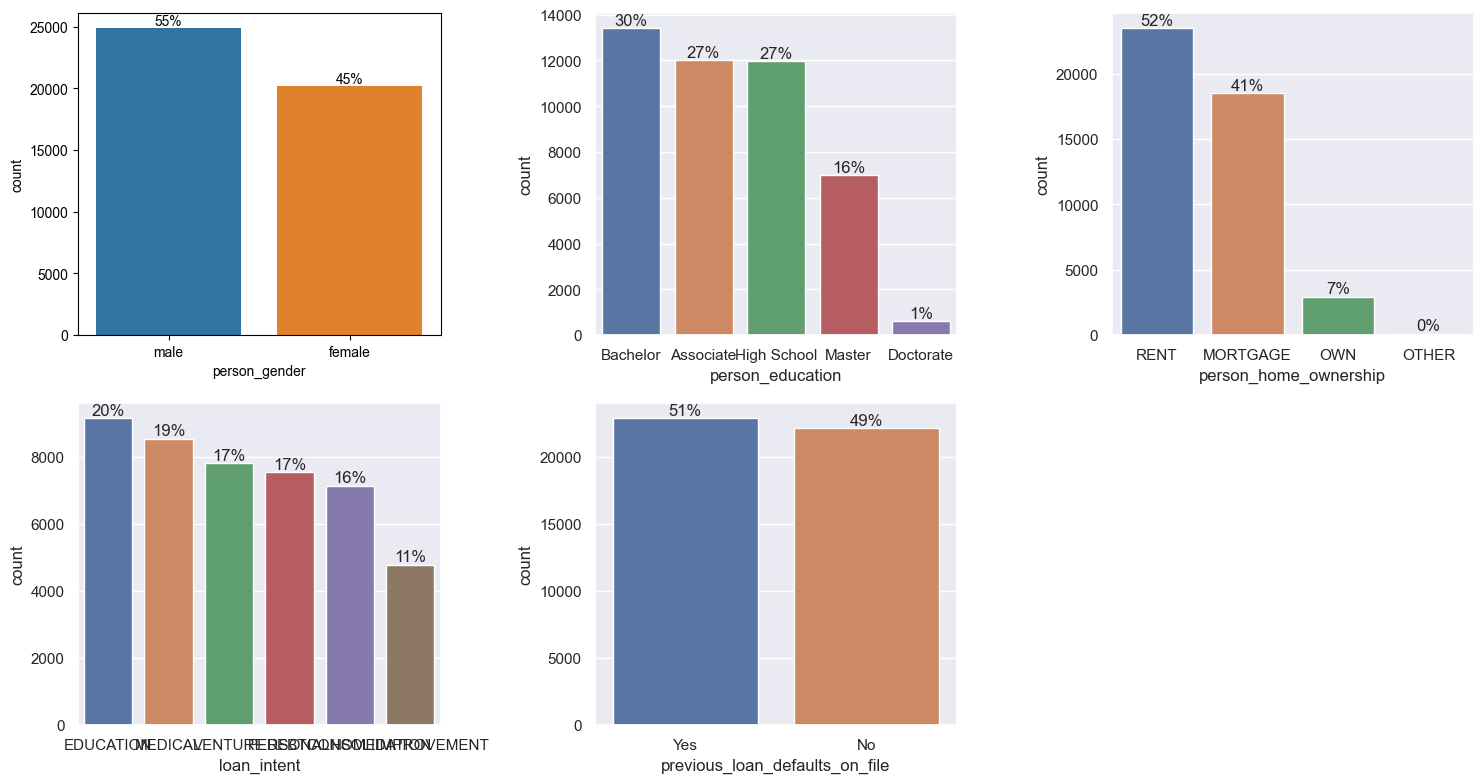

In [17]:
#visualize categorical columns
fig = plt.subplots(figsize=(15,8))
for i,j in enumerate(cat_columns):
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.countplot(x=j,data = data1,
                       order=data1[j].value_counts(ascending=False).index)
    rel_values = data1[j].value_counts(ascending = False,normalize=True).values*100
    lbls = [f'{p:.0f}%' for p in rel_values]
    ax.bar_label(ax.containers[0],labels = lbls)
    sns.set(font_scale=1)
plt.tight_layout()

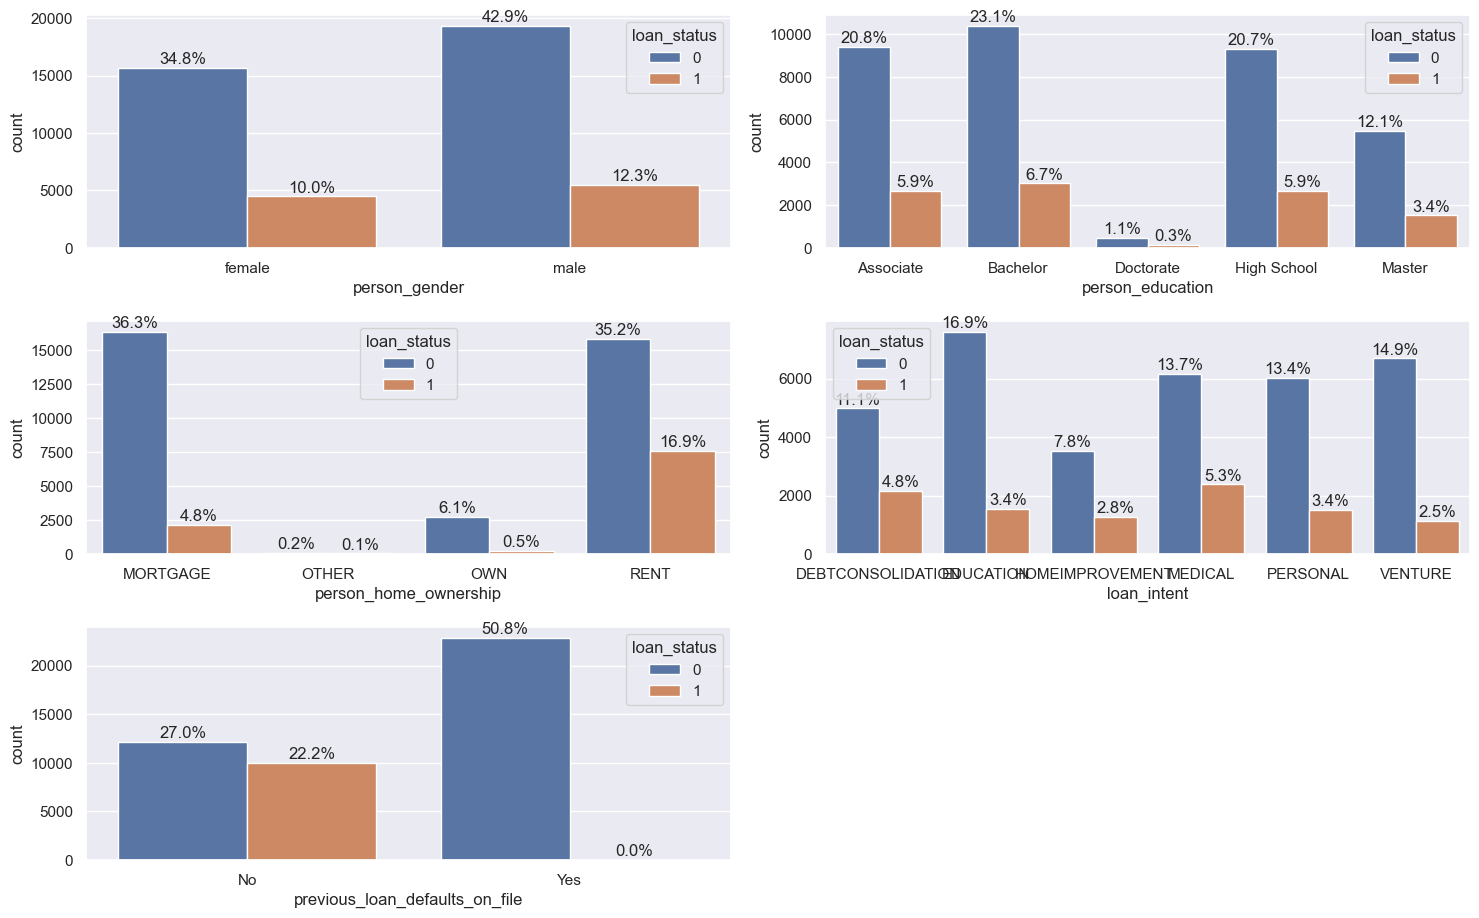

In [18]:
#visualize categorical columns against target
fig = plt.subplots(figsize=(15,15))
for i,j in enumerate(cat_columns):
    plt.subplot(5,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.countplot(data= data1, x=j,hue='loan_status')
    total = len(data1)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

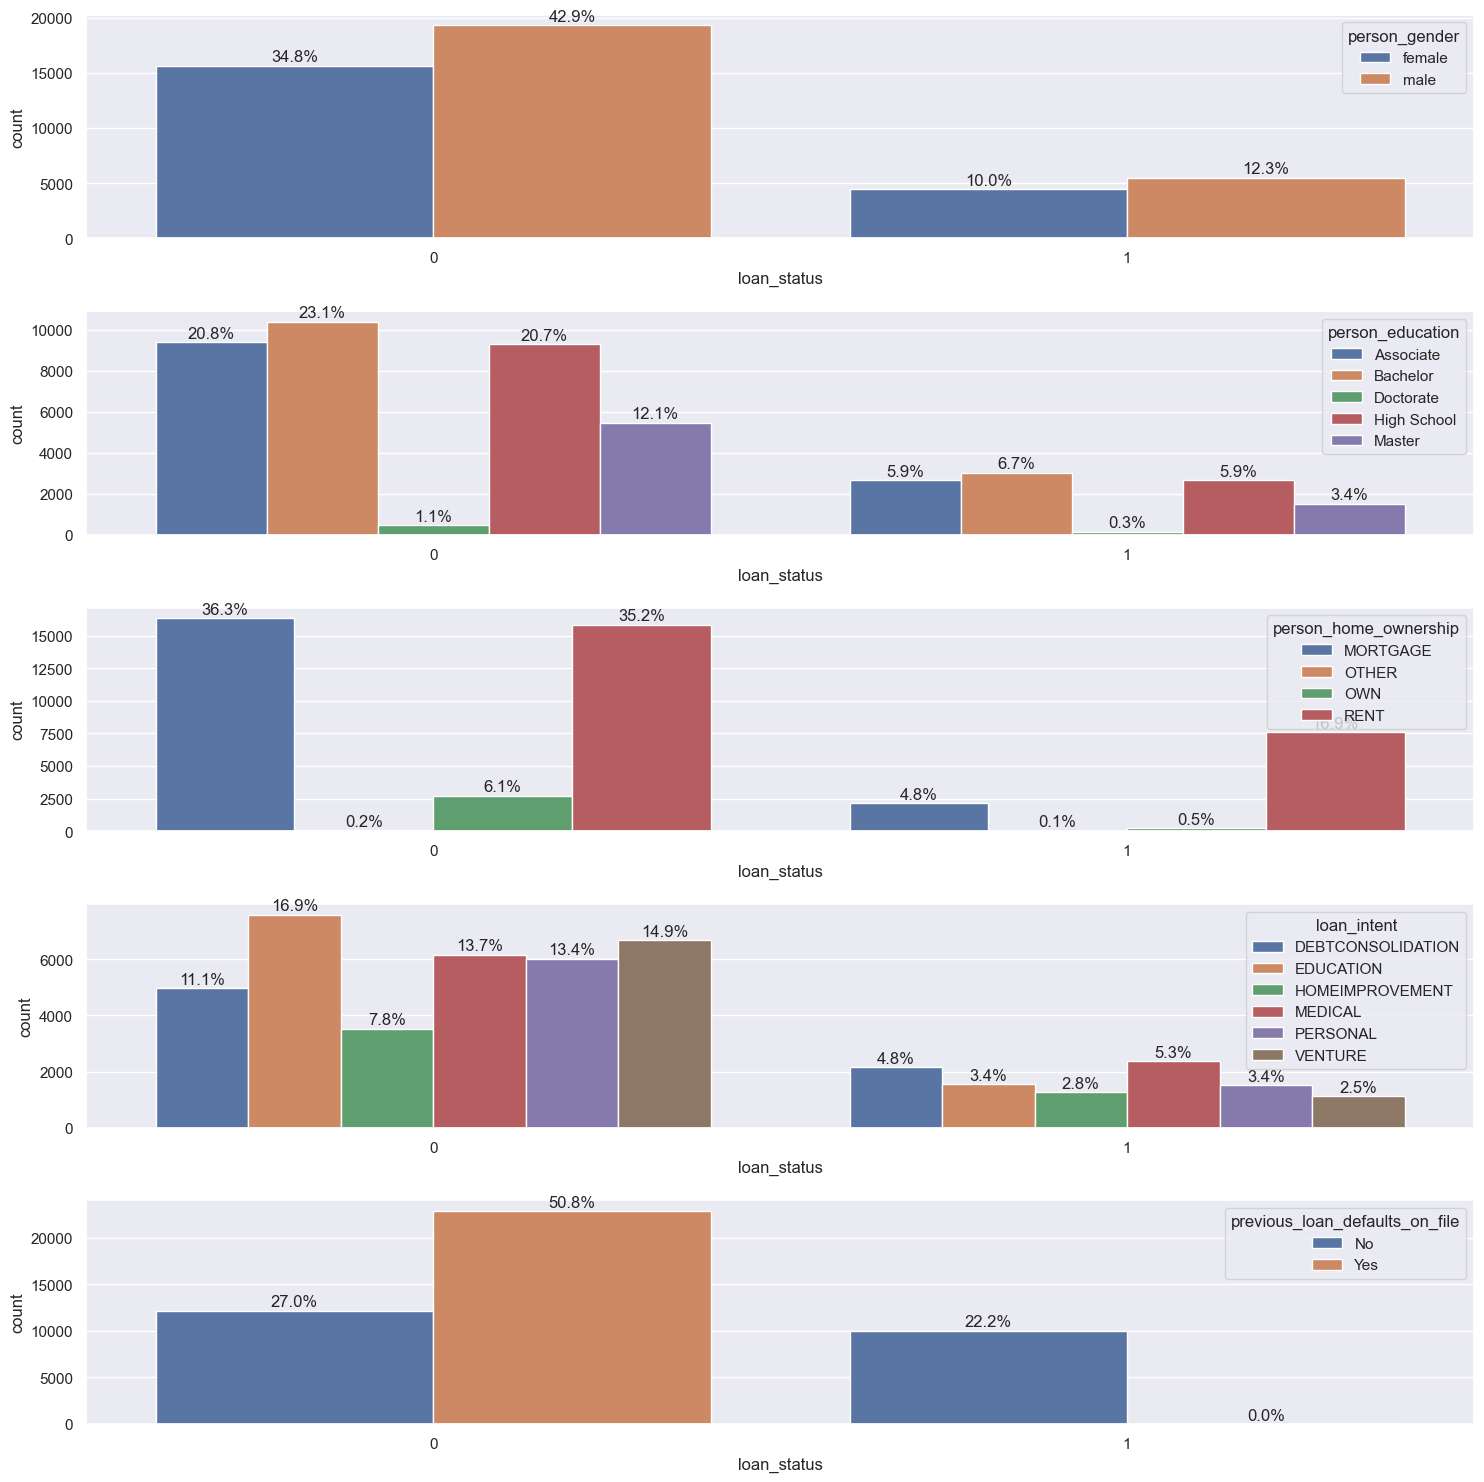

In [19]:
#visualize categorical columns against target
fig = plt.subplots(figsize=(15,15))
for i,j in enumerate(cat_columns):
    plt.subplot(5,1,i+1)
    plt.subplots_adjust(wspace=1.0)
    ax = sns.countplot(data= data1, x='loan_status',hue=j)
    total = len(data1)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()

In [22]:
#encode categorical variables
dumm_var = pd.DataFrame()
for col in cat_columns:
    static = pd.get_dummies(data1[col],prefix_sep='_',prefix=col)
    dumm_var = pd.concat([dumm_var,static],axis=1)

In [23]:
def plot_categorical_subplots(df, target='Loan_Status', cat_columns=None, ncols=3):
    """
    Plots approval rate bar charts (with labels) for each categorical feature using subplots.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - target (str): Binary target column (e.g., 'Loan_Status').
    - cat_columns (list): Optional list of categorical columns. Auto-detects if None.
    - ncols (int): Number of columns in subplot layout.
    """
    if cat_columns is None:
        cat_columns = df.select_dtypes(exclude=np.number).columns.tolist()

    nrows = int(np.ceil(len(cat_columns) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4.5 * nrows))
    axes = axes.flatten()
    plt.title("uuuu")
    for idx, col in enumerate(cat_columns):
        try:
            order = df.groupby(col)[target].mean().sort_values().index
            sns.barplot(x=col, y=target, data=df, ax=axes[idx], order=order)

            axes[idx].set_title(f'Approval Rate by {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel(f'Mean {target}')
            axes[idx].tick_params(axis='x', rotation=30)

            # Add value labels
            grouped = df.groupby(col)[target].mean()
            for p in axes[idx].patches:
                height = p.get_height()
                if not np.isnan(height):
                    axes[idx].text(
                        p.get_x() + p.get_width() / 2.,
                        height + 0.01,
                        f'{height:.2f}',
                        ha='center',
                        va='bottom',
                        fontsize=9
                    )
        except Exception as e:
            axes[idx].set_visible(False)
            print(f"Could not plot {col}: {e}")

    # Hide unused subplots
    for j in range(idx + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


In [40]:
data1.groupby('previous_loan_defaults_on_file')['loan_status'].agg(['count', 'sum', 'mean'])

,count,sum,mean
previous_loan_defaults_on_file,,,
No,22142,10000,0.45163
Yes,22858,0,0.00000


## NUMERICAL DATA EDA

8


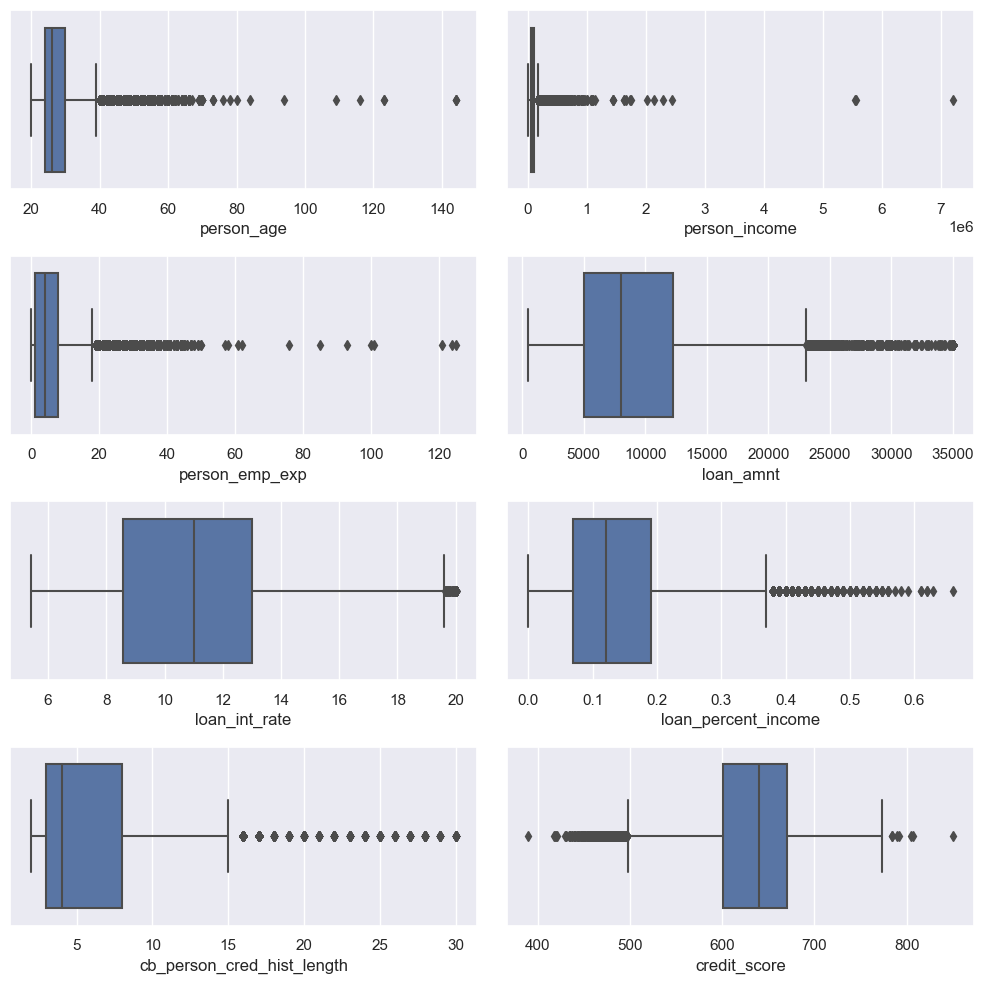

In [24]:
#visualize numerical columns
print(len(num_columns))
fig = plt.subplots(figsize=(10,10))
for i,j in enumerate(num_columns):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    sns.boxplot(x=j,data=data1)
plt.tight_layout()

8


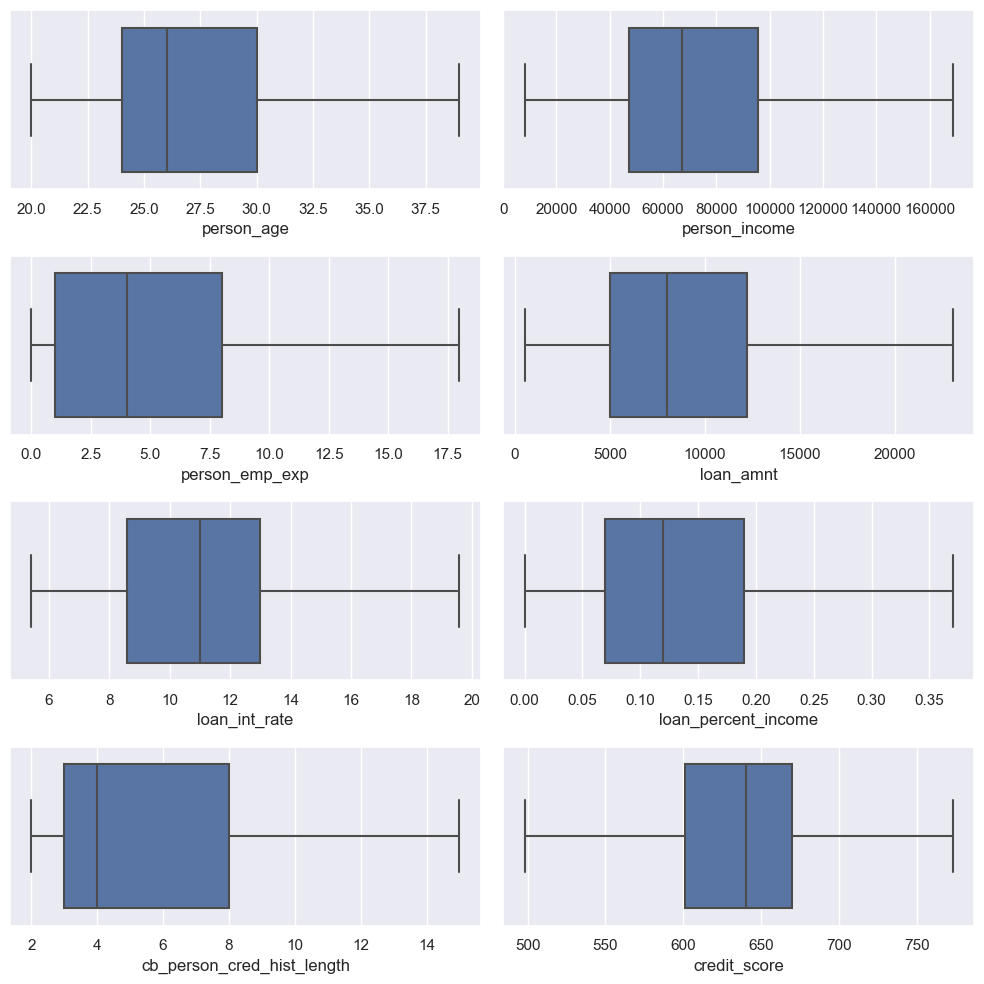

In [25]:
#visualize numerical columns removing outliers
print(len(num_columns))
fig = plt.subplots(figsize=(10,10))
for i,j in enumerate(num_columns):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    sns.boxplot(x=j,data=data1,showfliers=False)
plt.tight_layout()

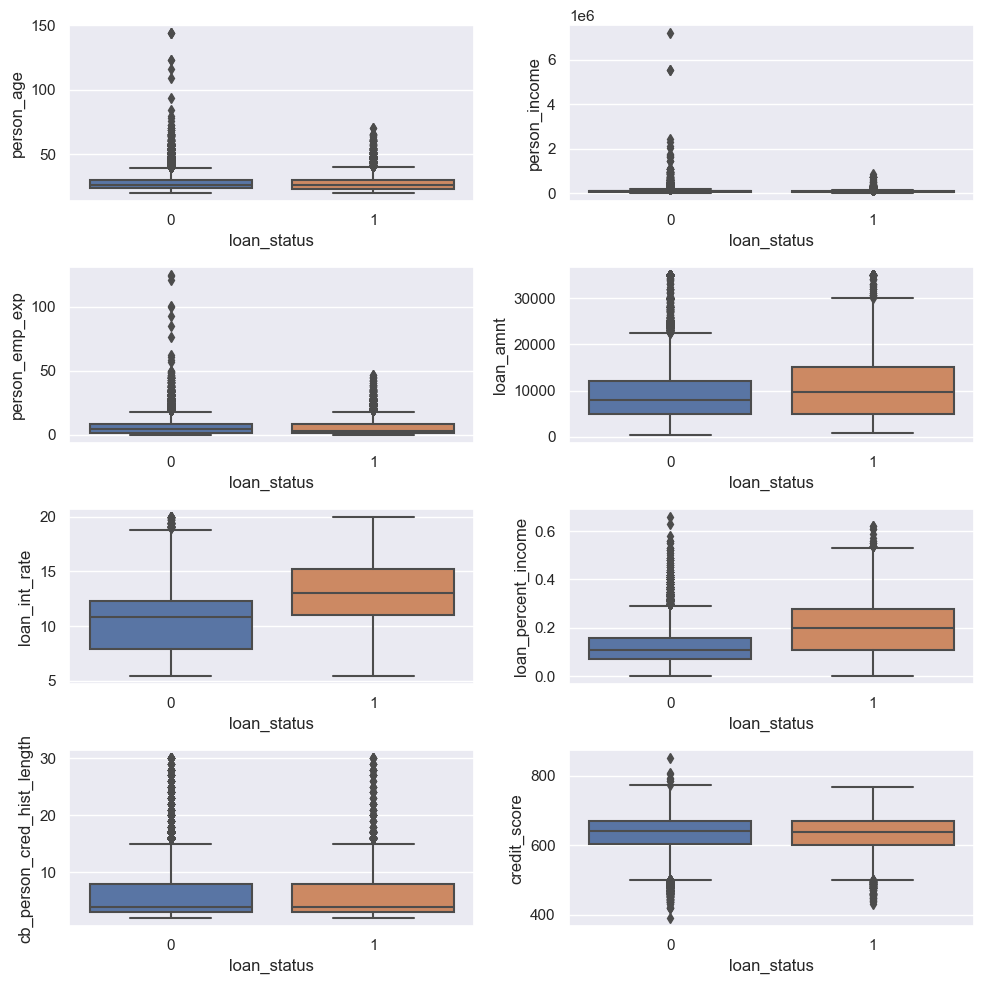

In [26]:
#visualize numerical columns aginst target
fig = plt.subplots(figsize=(10,10))
for i,j in enumerate(num_columns):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    sns.boxplot(x=data1.loan_status,y=j,data=data1)
plt.tight_layout()

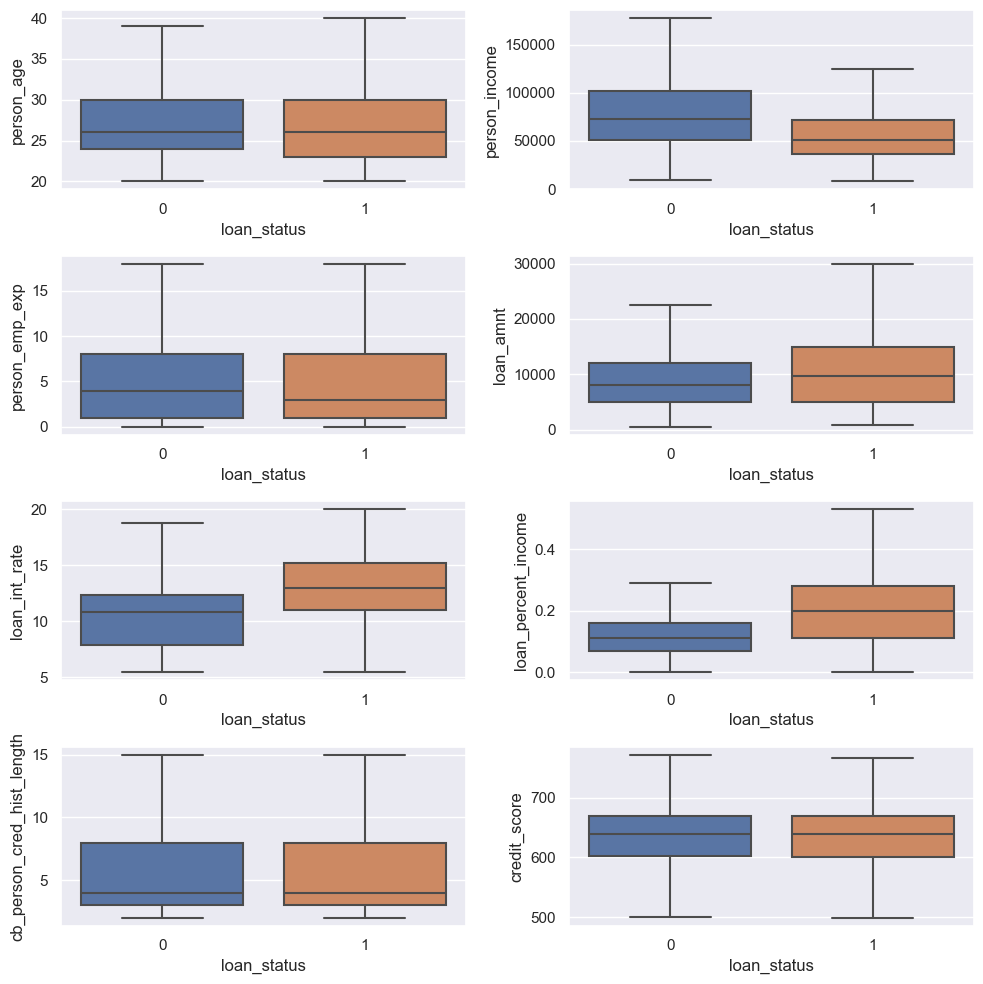

In [27]:
#visualize numerical columns against target #removing outliers
fig = plt.subplots(figsize=(10,10))
for i,j in enumerate(num_columns):
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(wspace=1.0)
    sns.boxplot(x=data1.loan_status,y=j,data=data1,showfliers=False)
plt.tight_layout()

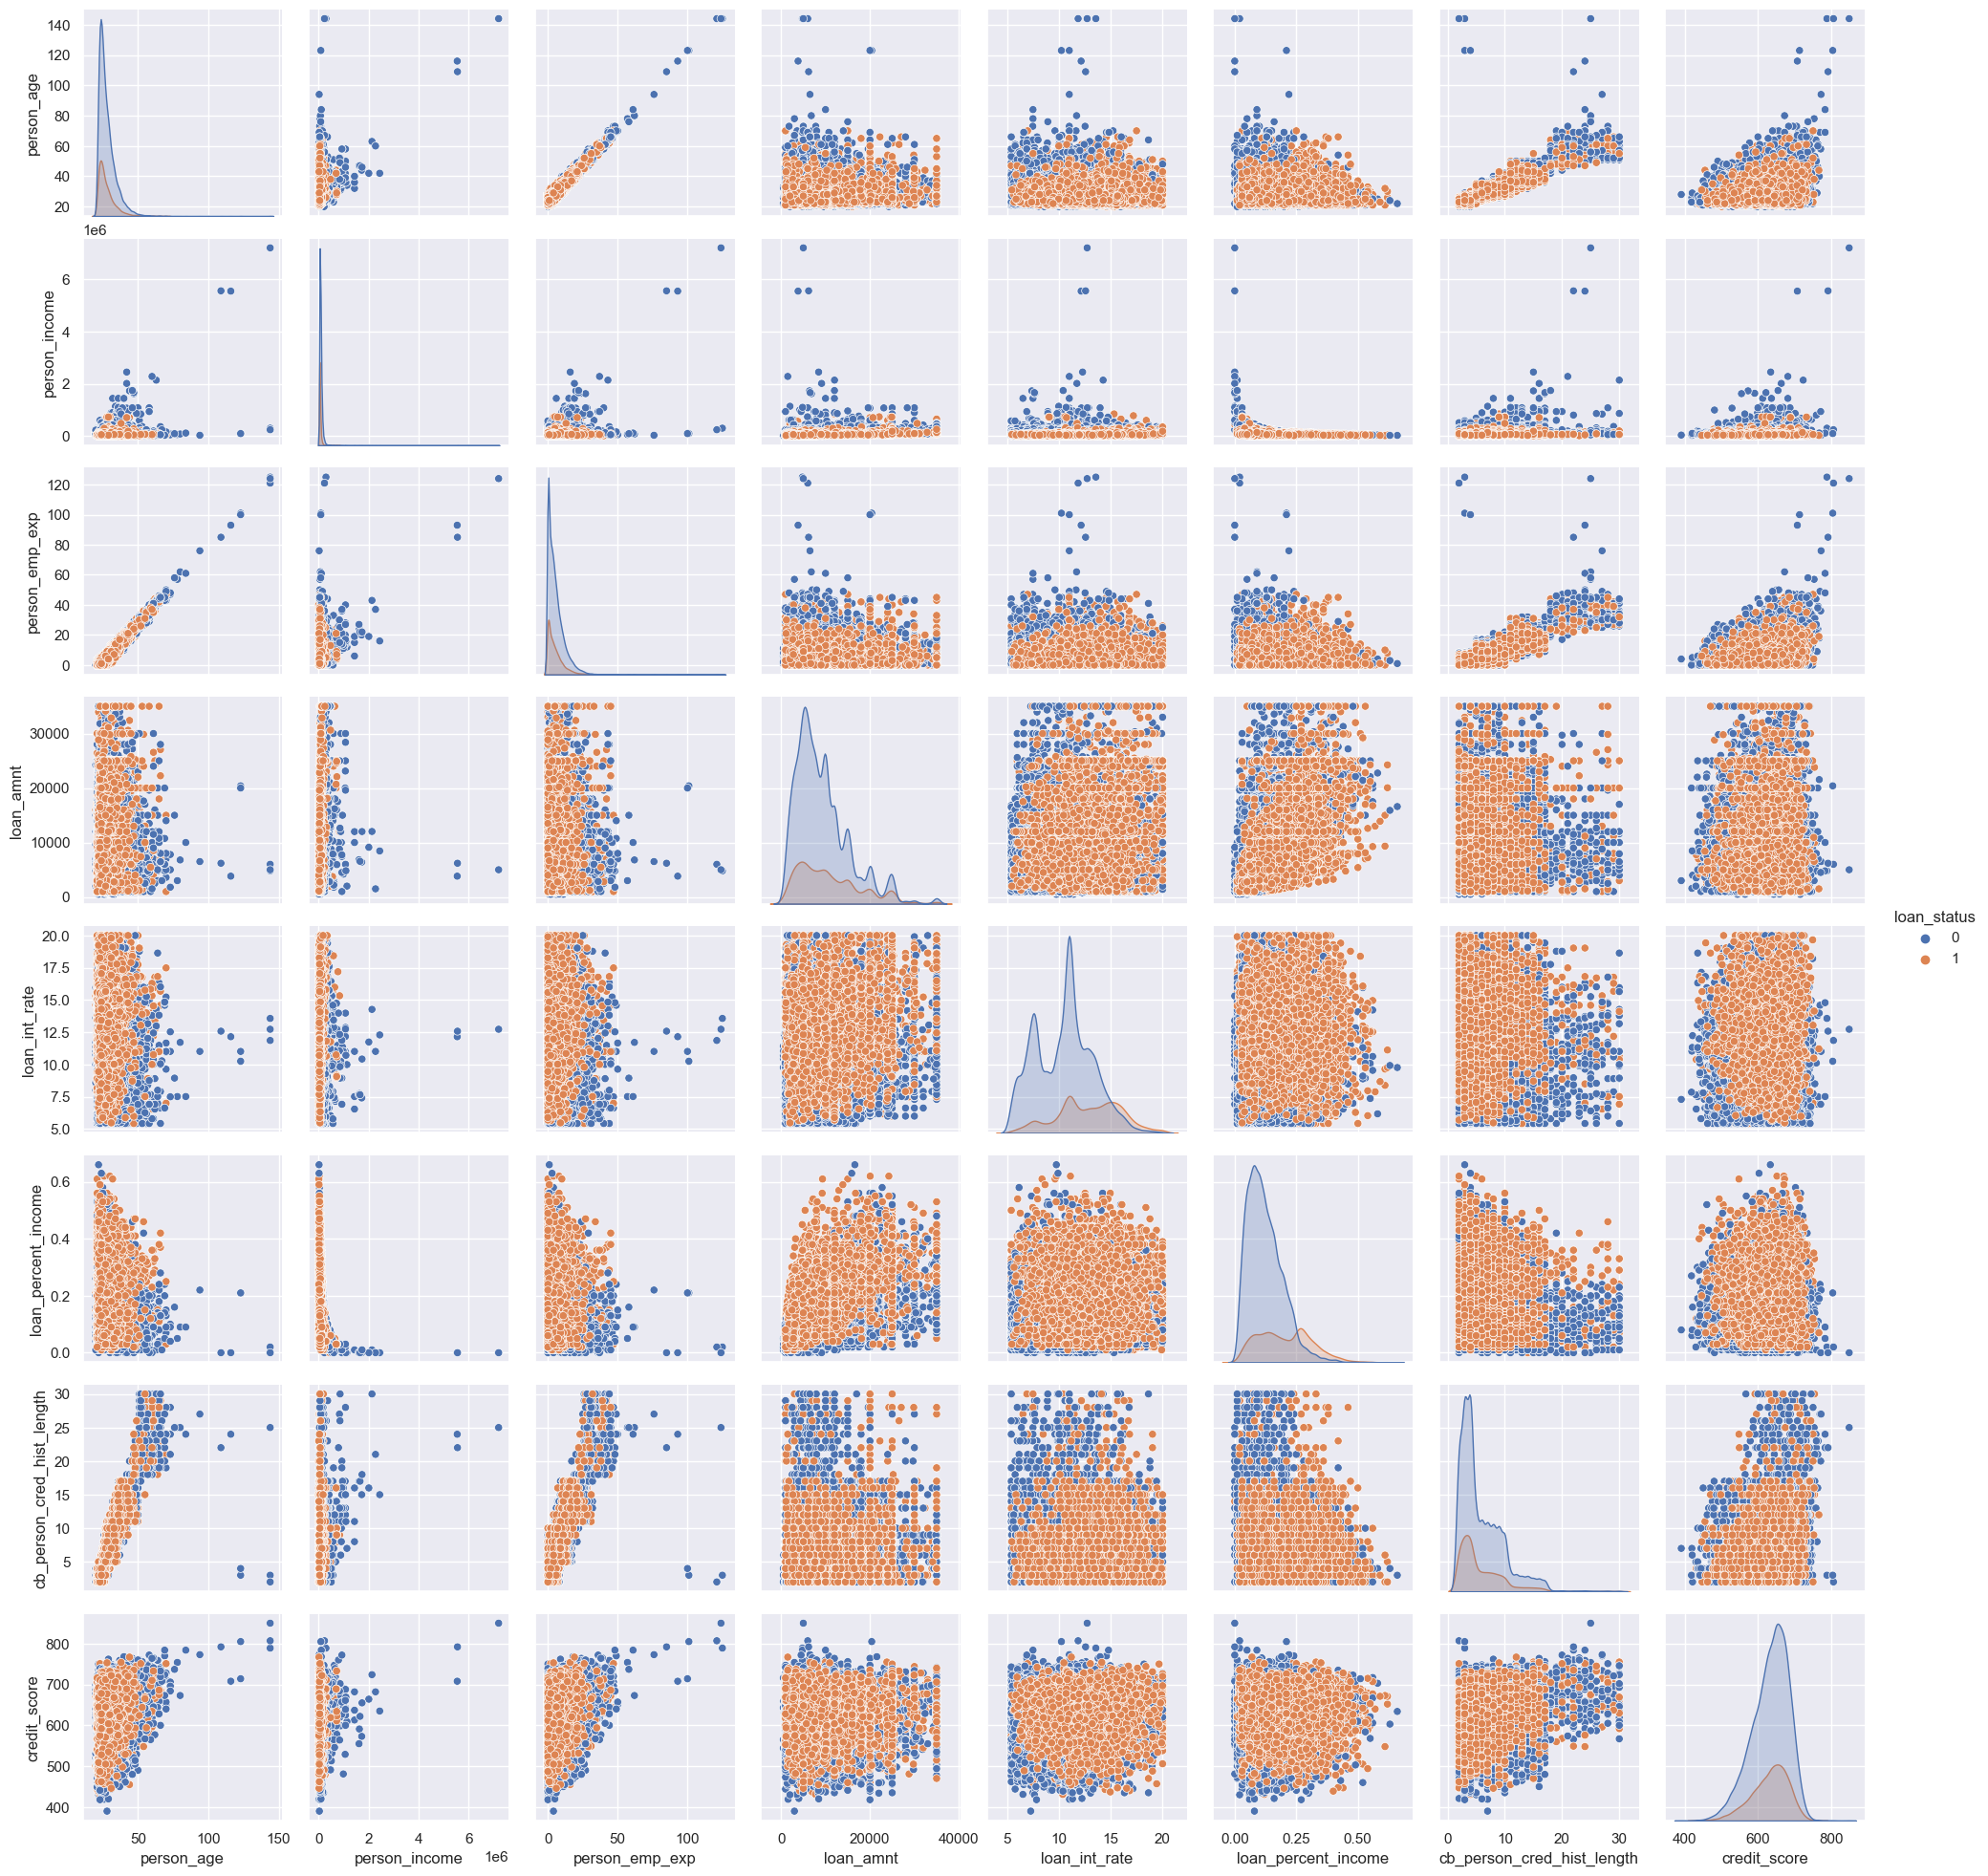

In [39]:
#pairplot visualization
numerical_data = data1[num_columns+['loan_status']]
pairplot = sns.pairplot(numerical_data,kind='scatter',hue='loan_status')
pairplot.savefig("pairplot.png")

## CORRELATION PLOTS

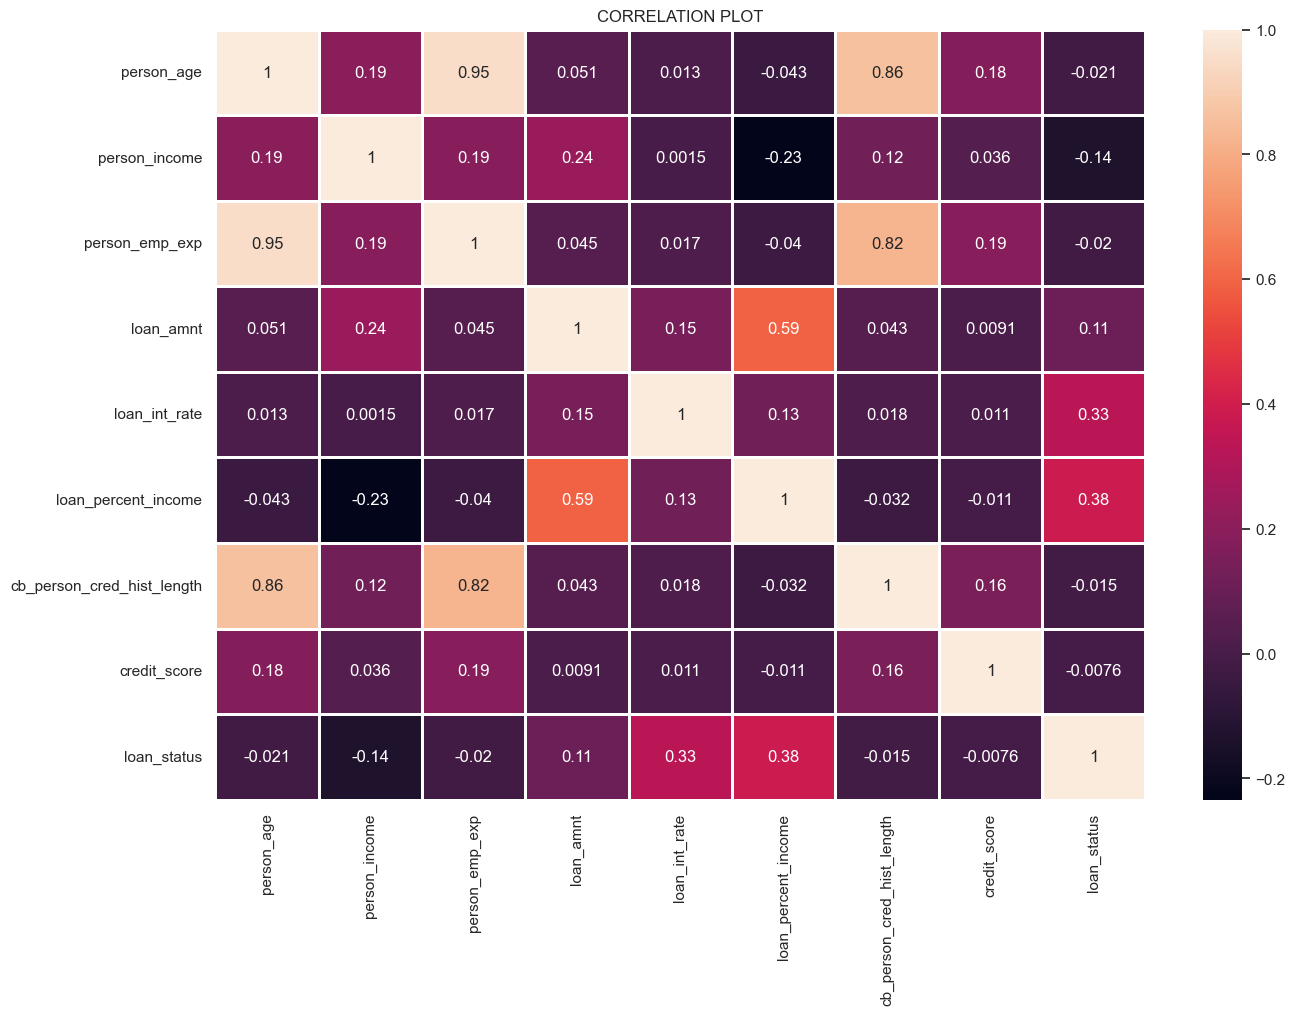

In [30]:
#plot correlation heatmap
plt.figure(figsize=(15,10))
corr_plot = numerical_data.corr()
sns.heatmap(corr_plot, linewidth = 1 , annot = True)
plt.title( "CORRELATION PLOT" )
plt.show()

In [31]:
#Variance Inflation Factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [32]:
calc_vif(data1[num_columns])

,variables,vif
0,person_age,156.228180
1,person_income,2.871934
2,person_emp_exp,11.534092
3,loan_amnt,6.735278
4,loan_int_rate,14.489486
5,loan_percent_income,7.161562
6,cb_person_cred_hist_length,12.089290
7,credit_score,91.349883


In [ ]:
num_columns 

In [ ]:
#Very high correlation on person's age and credit score

## MONOTONICITY CHECK

**Monotonicity check means ensuring that a model's predictions change in a logically consistent direction with respect to certain input features**

**1. BINNED X-Y VISUALS**

In [33]:
data1.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [34]:
print("number of columns",len(data1.columns))
print("number of categorical columns",len(cat_columns))
print("number of numerical columns",len(num_columns))


number of columns 14
number of categorical columns 5
number of numerical columns 8


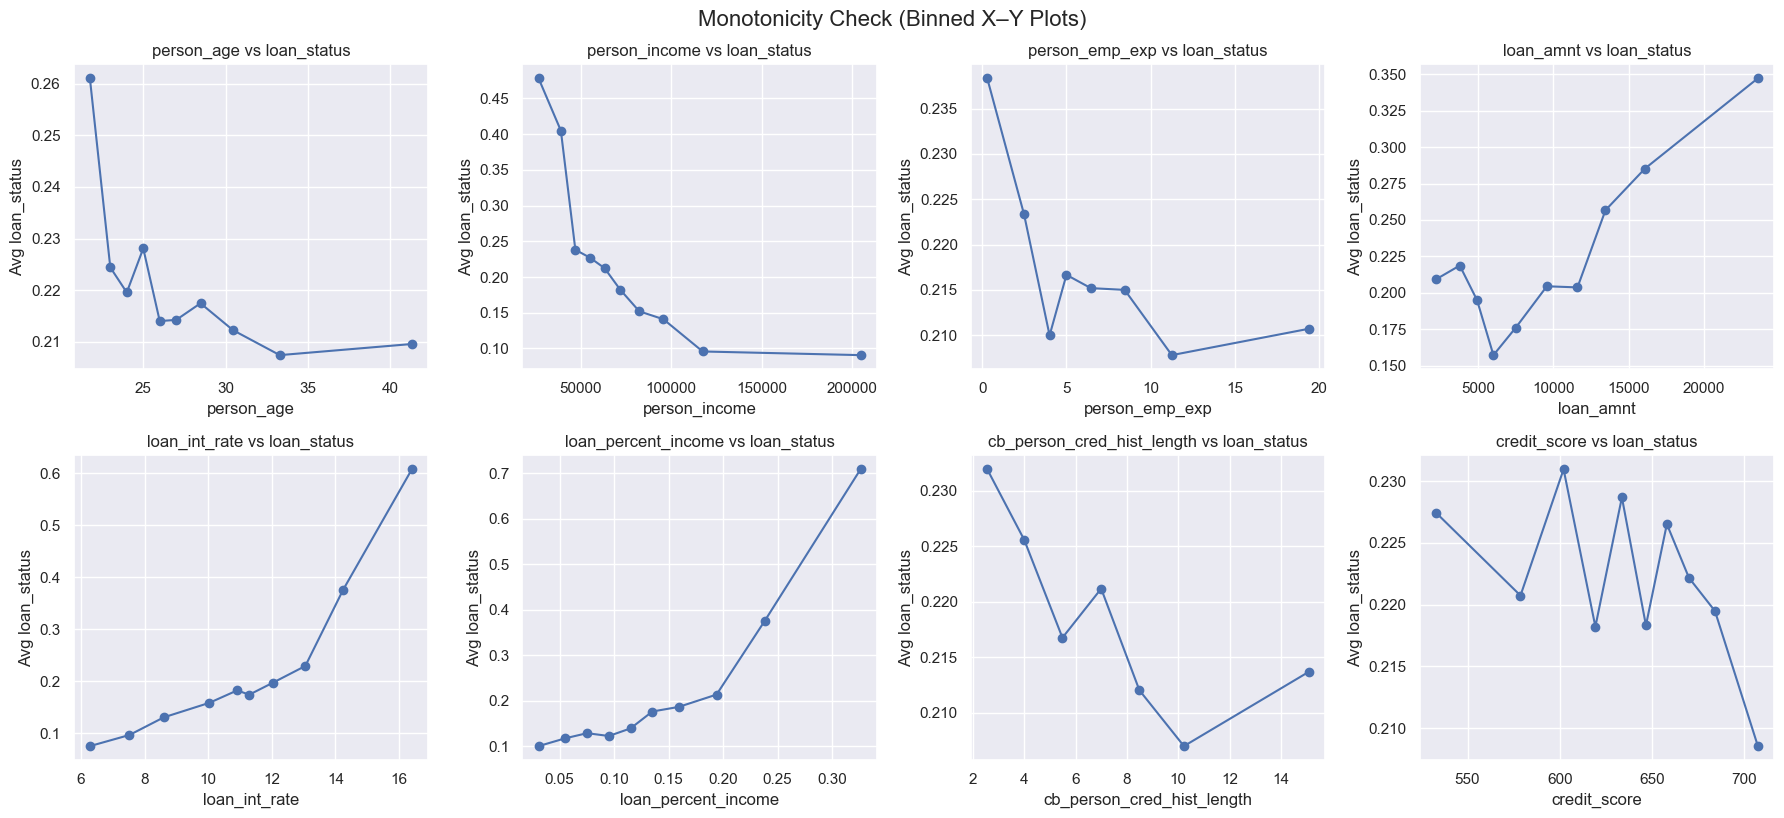

In [35]:
def plot_monotonicity_subplots(num_columns,df, target='loan_status'):
    """
    Plots monotonicity check plots for all numeric features using subplots.

    Parameters:
    - df (pd.DataFrame): Feature matrix containing numeric input features.
    - num_columns (list): list containing numeric input features.

    Returns:
    - Matplotlib figure with monotonic subplots (displays plot directly).
    """
    
    num_cols = len(num_columns)
    ncols = 4
    nrows = int(np.ceil(num_cols / ncols))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 4 * nrows))
    axes = axes.flatten()
    
    for idx, col in enumerate(num_columns):
        ax = axes[idx]
        try:
            df['bin'] = pd.qcut(df[col], q=10, duplicates='drop')
            mean_df = df.groupby('bin')[target].mean().reset_index()
            mean_df['bin_center'] = df.groupby('bin')[col].mean().values
            
            ax.plot(mean_df['bin_center'], mean_df[target], marker='o')
            ax.set_title(f'{col} vs {target}')
            ax.set_xlabel(col)
            ax.set_ylabel(f'Avg {target}')
            ax.grid(True)
        except Exception as e:
            ax.set_visible(False)
            print(f"Could not plot {col}: {e}")
    
    for i in range(idx + 1, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    fig.suptitle("Monotonicity Check (Binned X–Y Plots)", fontsize=16, y=1.02)
    plt.show()

plot_monotonicity_subplots(num_columns,df = data1)

**2. SPEARMAN CORRELATION**

In [37]:
print("\nSpearman Correlation with Loan_Status:")
for col in num_columns:
    corr, _ = spearmanr(data1[col], data1['loan_status'])
    print(f"{col}: {corr:.3f}")


Spearman Correlation with Loan_Status:
person_age: -0.030
person_income: -0.275
person_emp_exp: -0.027
loan_amnt: 0.087
loan_int_rate: 0.311
loan_percent_income: 0.324
cb_person_cred_hist_length: -0.020
credit_score: -0.008


**3. PDP PLOT**

In [38]:
# Define features and target
X = data1[num_columns]
y = data1['loan_status']

def pdp_plots(x,y):
    """
    Plots partial dependence plots (PDPs) for all numeric features using subplots.

    Parameters:
    - x (pd.DataFrame): Feature matrix containing numeric input features.
    - y (pd.Series): Binary target variable (e.g., loan approval status).

    Returns:
    - Matplotlib figure with PDP subplots (displays plot directly).
    """
    # Fit model
    model = GradientBoostingClassifier().fit(X, y)

    #PDP subplot configuration
    n_features = len(X.columns)
    ncols = 3
    nrows = int(np.ceil(n_features / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
    axes = axes.flatten()

    # Create PDP for each feature
    for i, feature in enumerate(X.columns):
        try:
            PartialDependenceDisplay.from_estimator(
                model,
                X,
                [feature],
                ax=axes[i],
                line_kw={"color": "tab:blue"},
                feature_names=X.columns
            )
        except Exception as e:
            print(f"Could not plot PDP for {feature}: {e}")
            axes[i].set_visible(False)

    # Hide unused axes if any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.suptitle("Partial Dependence Plots (PDPs)", fontsize=16, y=1.02)
    plt.show()


## OUTLIERS CHECK

In [ ]:
def detect_outliers_iqr(series, k=1.5):
    """
    Return a boolean mask (True = outlier) for a pandas Series using the IQR method.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return (series < lower_bound) | (series > upper_bound)

# Suppose df is your loan DataFrame
num_cols = ["person_income", "loan_amnt", "loan_percent_income", "credit_score", ...]
outlier_masks = {}
for col in num_columns:
    mask = detect_outliers_iqr(data1[col].dropna(), k=1.5)
    outlier_count = mask.sum()
    pct = outlier_count / data1.shape[0]
    print(f"{col}: {outlier_count} outliers ({pct:.2%} of rows)")
    outlier_masks[col] = mask
